In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [56]:
df=pd.read_csv("E:\DATA Science\DWDM_prac//Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [57]:
df.drop(['normalized-losses'],axis=1,inplace=True)

In [59]:
for i in df.columns:
    for j in range(len(df)):
        if df[i][j]=="?":
            df[i][j]=np.nan

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [61]:
df['bore']=df['bore'].fillna(round(df['bore'].astype(float).mean(),2))
df['stroke']=df['stroke'].fillna(round(df['stroke'].astype(float).mean(),2))

In [63]:
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median())
df['price']=df['price'].fillna(round(df['price'].astype(float).median()))

In [64]:
df['horsepower']=df['horsepower'].fillna(round(df['horsepower'].astype(float).median()))

In [67]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [139]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

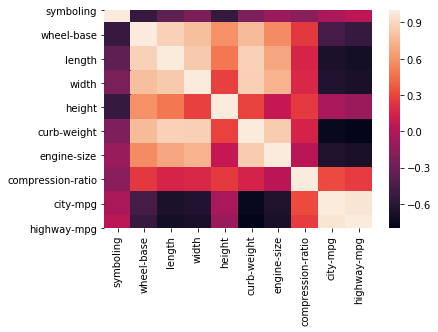

In [68]:
sns.heatmap(df.corr())

In [109]:
high_corr=['wheel-base','width','curb-weight','engine-size','highway-mpg']

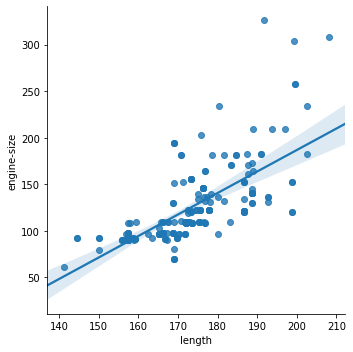

In [107]:
sns.lmplot(x='length',y='engine-size',data=df)

In [110]:
df.drop(high_corr,axis=1,inplace=True)

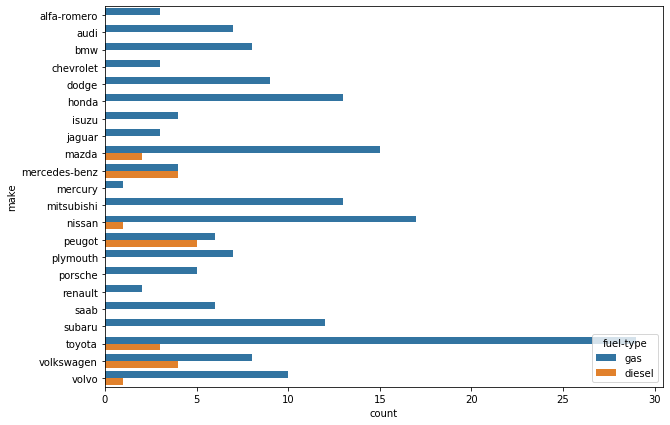

In [82]:
plt.figure(figsize=(10,7))
sns.countplot(y=df['make'],hue=df['fuel-type'])

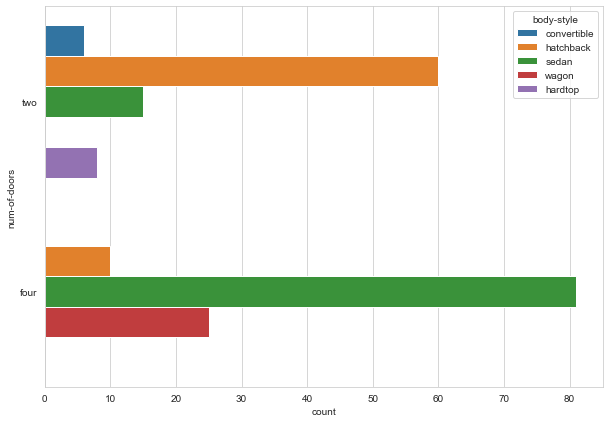

In [138]:
plt.figure(figsize=(10,7))
sns.countplot(y=df['num-of-doors'],hue=df['body-style'])

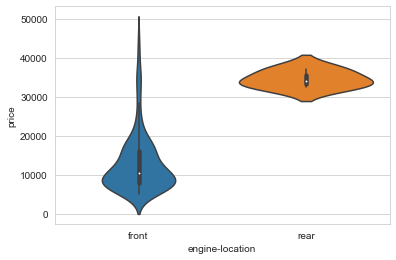

In [141]:
sns.violinplot(x="engine-location", y="price", data=df)

In [90]:
df['price']=df['price'].astype(int)

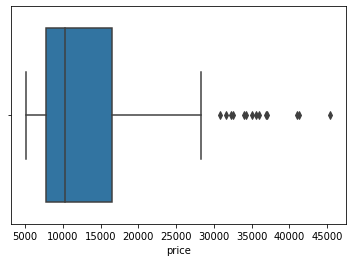

In [128]:
sns.boxplot(df['price'])

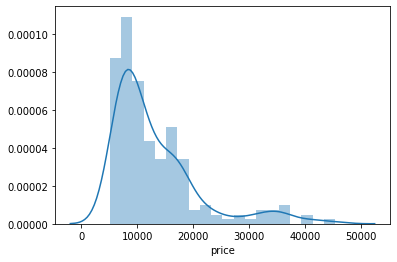

In [100]:
sns.distplot(df['price'],bins=20)

In [97]:
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)

In [101]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [120]:
# df.info()
df['horsepower']=df['horsepower'].astype(int)
df['peak-rpm']=df['peak-rpm'].astype(int)

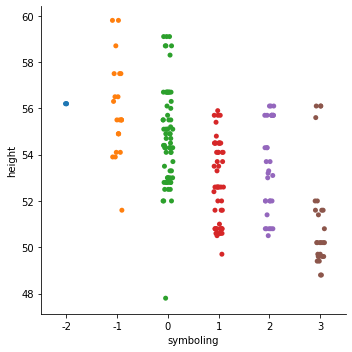

In [119]:
sns.catplot(x='symboling',y='height',data=df)

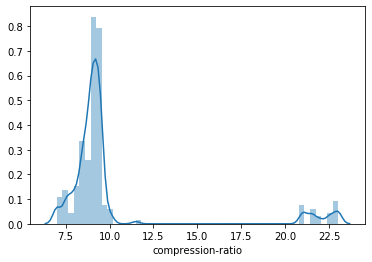

In [125]:
sns.distplot(df['compression-ratio'])

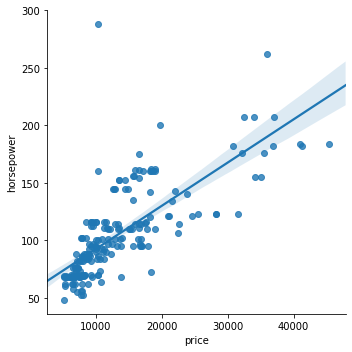

In [127]:
sns.lmplot(x='price',y='horsepower',data=df)

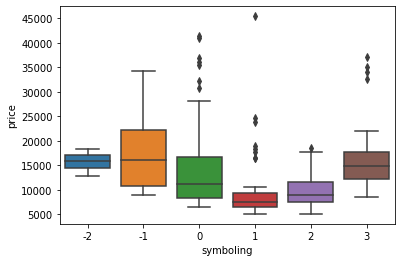

In [130]:
sns.boxplot(x="symboling", y="price",data=df)